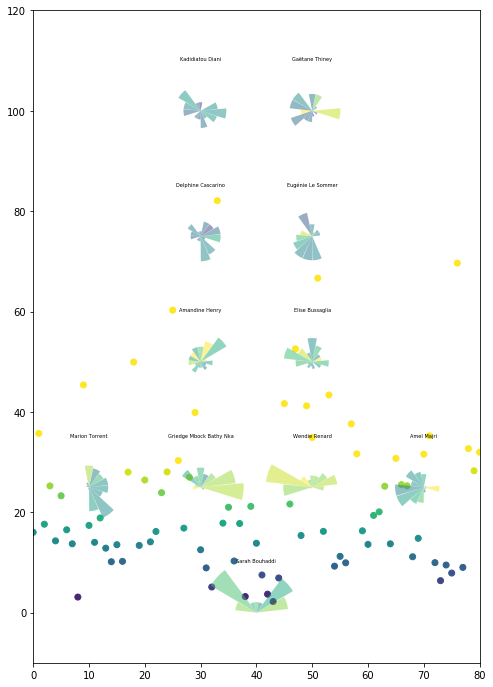

In [2]:
from importing_sb import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.projections import get_projection_class
from matplotlib.patches import Arc

data_dir = '/Users/jm533/Documents/GitHub/football_analytics/open-data/data/'

obj = open_data(data_dir + 'events/22921.json')
df = json_normalize(obj)

passes = df[df['type.name'] == 'Pass']

# Getting player names
player_dict = {}

klist = []

for player in df['tactics.lineup'][0]:
    name = player['player']['name']
    klist.append(name)
    
#xlist = [0,30,30,30,30,50,50,70,70,90,90]
#ylist = [40,10,30,50,70,30,50,30,50,30,50]
ylist = [0,25,25,25,25,50,50,75,75,100,100]
xlist = [40,10,30,50,70,30,50,30,50,30,50]

for x,y,z in zip(xlist, ylist, klist):
    entry = {z:[x,y]}
    player_dict.update(entry)
    
def Passer(player):
    local_df = df.copy()
    local_df = local_df[(local_df["type.name"] == "Pass")&(local_df["player.name"] == str(player))]
    local_df = local_df.dropna(axis='columns', how='all')
    
    df1 = local_df[['pass.angle','pass.length']].copy()
    
    bins = np.linspace(-np.pi,np.pi,16)
    
    df1['binned'] = pd.cut(local_df['pass.angle'], bins, include_lowest=True, right=True)
    df1["Bin_Mids"] = df1["binned"].apply(lambda x: x.mid)
    #df1 = df1[:-1]
    
    A = df1.groupby("Bin_Mids", as_index=False)["pass.length"].mean()
    A = A.dropna(axis='index')
    
    groups = df1.groupby('Bin_Mids', as_index=False)
    pass_frac = groups.size()/len(df1)
    pass_frac = pass_frac[pass_frac != 0].values
    
    A['pass_frac'] = pass_frac
    
    return A

#a = Passer(klist[0])
#
#ax = plt.subplot(111, projection='polar')
#
#ax.bar(a["Bin_Mids"], a["pass.length"])
#
#plt.show()

#fig, ax = plt.subplots(figsize=(8,12))
#
##ax.set_xlim(-10,120)
##ax.set_ylim(0,80)
#ax.set_ylim(-10,120)
#ax.set_xlim(0,80)
#
#def plot_inset(width, axis_main, data, x, y):
#    ax_sub = inset_axes(axis_main, width=width, height=width, loc='center',
#                       bbox_to_anchor=(x,y),
#                       bbox_transform=axis_main.transData,
#                       borderpad=0.0, axes_class=get_projection_class("polar"))
#
#    theta = data["Bin_Mids"]
#    radii = data["pass.length"]
#    bars = ax_sub.bar(theta, radii, width=0.3, bottom=0.0)
#
#    ax_sub.set_ylim(0,50)
#    ax_sub.set_xticklabels([])
#    ax_sub.set_yticks([])
#    ax_sub.yaxis.grid(False)
#    ax_sub.xaxis.grid(False)
#    ax_sub.spines['polar'].set_visible(False)
#    ax_sub.set_theta_zero_location("N")
#    ax_sub.patch.set_alpha(0)  # Sets the axis backgrounds alpha
#
##    for r, bar in zip(theta, bars):
##        bar.set_facecolor(plt.cm.viridis(r))
##        bar.set_alpha(0.5)
#    
#    cmap = plt.cm.get_cmap('viridis')
#    norm = plt.Normalize(vmin=0,vmax=40)
#    for r, bar in zip(radii, bars):
#        bar.set_facecolor(cmap(norm(r)))
#        bar.set_alpha(0.5)
#
#    return ax_sub
#
#for player, loc in player_dict.items():
#    plot_inset(1.1, ax, data = Passer(str(player)), x = loc[0], y = loc[1])
#    ax.text(loc[0], loc[1]+10, player, size=5, ha='center')
#    
#plt.show()

fig, ax = plt.subplots(figsize=(8,12))

ax.set_ylim(-10,120)
ax.set_xlim(0,80)

def plot_inset(width, axis_main, data, x, y):
    ax_sub = inset_axes(axis_main, width=width, height=width, loc='center',
                       bbox_to_anchor=(x,y),
                       bbox_transform=axis_main.transData,
                       borderpad=0.0, axes_class=get_projection_class("polar"))

    theta = data["Bin_Mids"]
    radii = data["pass_frac"]
    p_length = data['pass.length']
    bars = ax_sub.bar(theta, radii, width=0.4, bottom=0.0)

    ax_sub.set_ylim(0,0.3)
    ax_sub.set_xticklabels([])
    ax_sub.set_yticks([])
    ax_sub.yaxis.grid(False)
    ax_sub.xaxis.grid(False)
    ax_sub.spines['polar'].set_visible(False)
    ax_sub.set_theta_zero_location("N")
    ax_sub.patch.set_alpha(0)  # Sets the axis backgrounds alpha
    
    cmap = plt.cm.get_cmap('viridis')
    norm = plt.Normalize(vmin=0,vmax=30)
    for p, bar in zip(p_length, bars):
        bar.set_facecolor(cmap(norm(p)))
        bar.set_alpha(0.5)
        
    #fig.colorbar(bars)
    
    return ax_sub

for player, loc in player_dict.items():
    plot_inset(1.5, ax, data = Passer(str(player)), x = loc[0], y = loc[1])
    ax.text(loc[0], loc[1]+10, player, size=5, ha='center')

#plot = plt.bars(yf[i], xf[i],zorder=0,c=xf_xG[i], vmin=0, vmax=0.8, cmap=cmap)
cmap = plt.cm.get_cmap('viridis')
plot = ax.scatter(np.arange(len(passes)), passes['pass.length'].values,zorder=-5,c=passes['pass.length'].values, vmin=0, vmax=30, cmap=cmap)

#fig.colorbar(plot)

plt.show()